In [778]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
# from imblearn.combine import SMOTETomek, SMOTEENN

In [779]:
churn_df = pd.read_excel("CFM KTP_Stage 1 task_churn dataset.xlsx")

In [780]:
churn_df.head()

,CallFailure,Complains,SubscriptionLength,ChargeAmount,SecondsUse,FrequencyUse,FrequencySMS,DistinctCalls,AgeGroup,TariffPlan,Status,Age,CustomerValue,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [781]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CallFailure         3150 non-null   int64  
 1   Complains           3150 non-null   int64  
 2   SubscriptionLength  3150 non-null   int64  
 3   ChargeAmount        3150 non-null   int64  
 4   SecondsUse          3150 non-null   int64  
 5   FrequencyUse        3150 non-null   int64  
 6   FrequencySMS        3150 non-null   int64  
 7   DistinctCalls       3150 non-null   int64  
 8   AgeGroup            3150 non-null   int64  
 9   TariffPlan          3150 non-null   int64  
 10  Status              3150 non-null   int64  
 11  Age                 3150 non-null   int64  
 12  CustomerValue       3150 non-null   float64
 13  Churn               3150 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 344.7 KB


In [782]:
churn_df.shape

(3150, 14)

In [783]:
# Checking for the number of duplicate rows, if any 
churn_df.duplicated().sum()

300

In [784]:
# duplicate = churn_df[churn_df.duplicated()]
# duplicate

In [785]:
# churn_df.loc[churn_df["CustomerValue"] == 721.98]

In [786]:
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CallFailure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
Complains,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
SubscriptionLength,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
ChargeAmount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
SecondsUse,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
FrequencyUse,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
FrequencySMS,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
DistinctCalls,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
AgeGroup,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
TariffPlan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


In [787]:
churn_df.isnull().sum()

CallFailure           0
Complains             0
SubscriptionLength    0
ChargeAmount          0
SecondsUse            0
FrequencyUse          0
FrequencySMS          0
DistinctCalls         0
AgeGroup              0
TariffPlan            0
Status                0
Age                   0
CustomerValue         0
Churn                 0
dtype: int64

* The data is clean, no missing values
* There are duplicate rows in the data
* All column are numerical, although there are categorical columns that have been converted to numrical

### Exploratory Data Analysis

In [788]:
num= []
cat = []

for i in churn_df.columns:
    if len(churn_df[i].unique()) > 10:
        num.append(i)
    else:
        cat.append(i)

In [789]:
cat

['Complains', 'AgeGroup', 'TariffPlan', 'Status', 'Age', 'Churn']

In [790]:
num

['CallFailure',
 'SubscriptionLength',
 'ChargeAmount',
 'SecondsUse',
 'FrequencyUse',
 'FrequencySMS',
 'DistinctCalls',
 'CustomerValue']

In [851]:
churn_df["Age"].unique()

array([30, 25, 15, 45, 55], dtype=int64)

#### How does TariffPlan affect the rate of Churn

In [792]:
# Table showing how tarrifplan relates to churn
Tariffplan = churn_df.groupby(['TariffPlan', 'Churn']).size().unstack().reset_index()
Tariffplan.columns = ["TariffPlan", "Did Not Churn", "Churn"]
Tariffplan

,TariffPlan,Did Not Churn,Churn
0,1,2416,489
1,2,239,6


In [793]:
Tariffplan_rate = churn_df.groupby('TariffPlan')['Churn'].value_counts(normalize=True).unstack().multiply(100).round(2).reset_index()
Tariffplan_rate.columns = ["TariffPlan", "Did Not Churn Rate %", "Churn Rate %"]
Tariffplan_rate

,TariffPlan,Did Not Churn Rate %,Churn Rate %
0,1,83.17,16.83
1,2,97.55,2.45


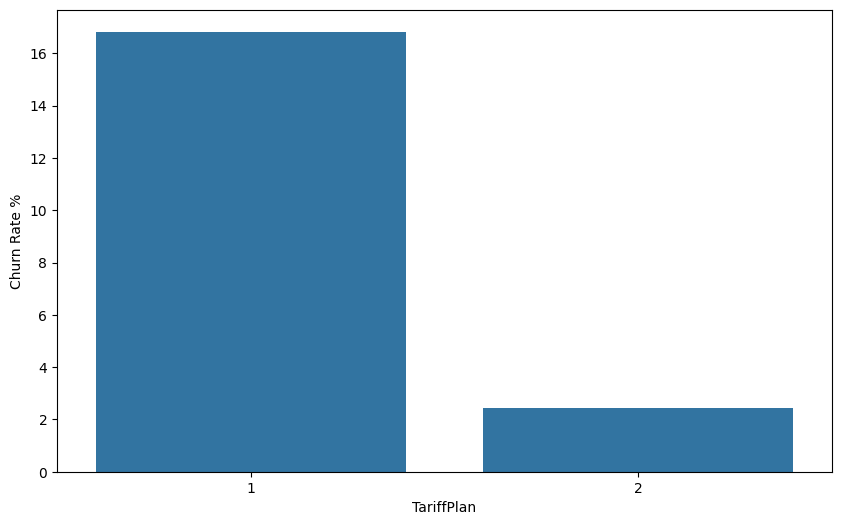

In [794]:
plt.figure(figsize=(10, 6))
sns.barplot(data = Tariffplan_rate, y = "Churn Rate %", x = "TariffPlan")
plt.show()

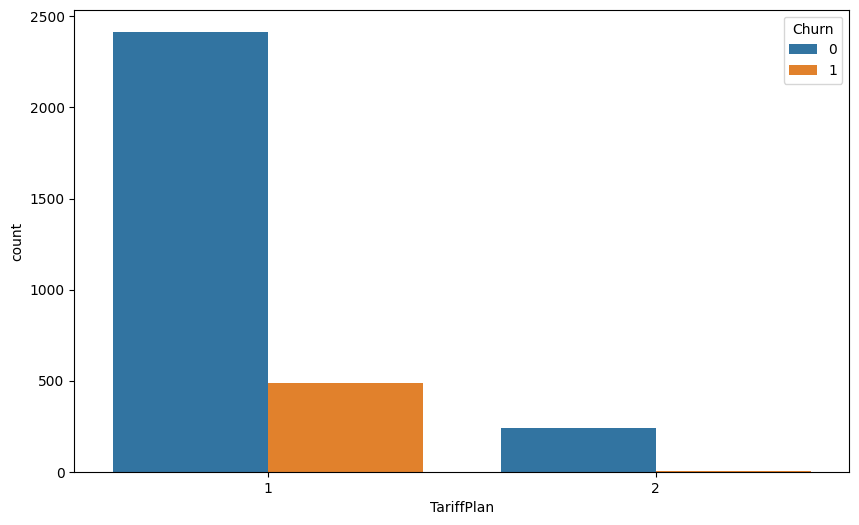

In [795]:
plt.figure(figsize=(10, 6))
sns.countplot(data = churn_df, x = "TariffPlan", hue = "Churn")
plt.show()

#### How does Complains affect the rate of Churn

In [796]:
# Table showing how Complains relates to churn
Complains = churn_df.groupby(['Complains', 'Churn']).size().unstack().reset_index()
Complains.columns = ["Complains", "Did Not Churn", "Churn"]
Complains

,Complains,Did Not Churn,Churn
0,0,2614,295
1,1,41,200


In [797]:
Complains_rate = churn_df.groupby('Complains')['Churn'].value_counts(normalize=True).unstack().multiply(100).round(0).reset_index()
Complains_rate.columns = ["Complains", "Did Not Churn Rate %", "Churn Rate %"]
Complains_rate

,Complains,Did Not Churn Rate %,Churn Rate %
0,0,90.0,10.0
1,1,17.0,83.0


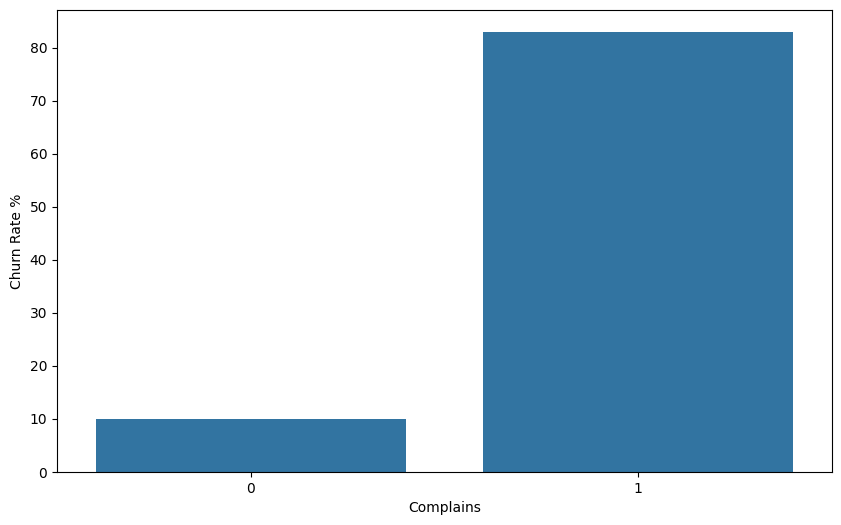

In [798]:
plt.figure(figsize=(10, 6))
sns.barplot(data = Complains_rate, y = "Churn Rate %", x = "Complains")
plt.show()

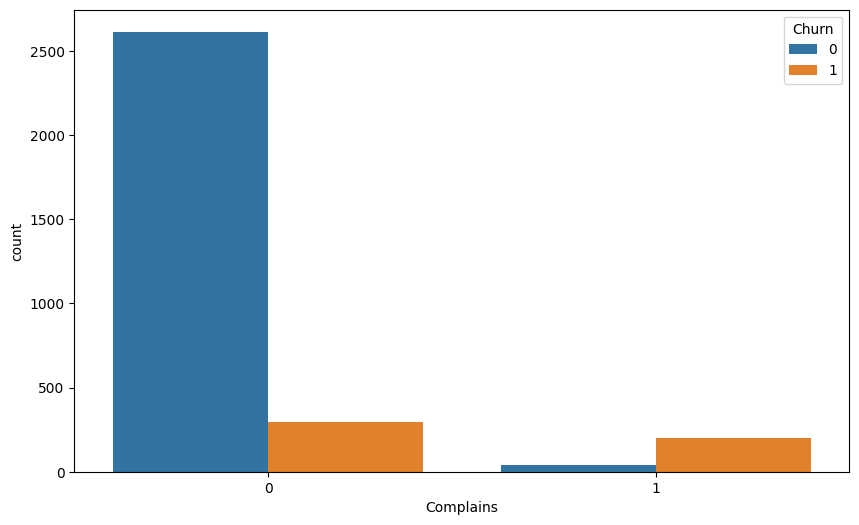

In [799]:
plt.figure(figsize=(10, 6))
sns.countplot(data = churn_df, x = "Complains", hue = "Churn")
plt.show()

#### How does Status affect the rate of Churn

In [850]:
# Table showing how Complains relates to churn
Status = churn_df.groupby(['Status', 'Churn']).size().unstack().reset_index()
Status.columns = ["Status", "Did Not Churn", "Churn"]
Status

,Status,Did Not Churn,Churn
0,1,2243,125
1,2,412,370


In [801]:
Status_rate = churn_df.groupby('Status')['Churn'].value_counts(normalize=True).unstack().multiply(100).round(0).reset_index()
Status_rate.columns = ["Status", "Did Not Churn Rate %", "Churn Rate %"]
Status_rate

,Status,Did Not Churn Rate %,Churn Rate %
0,1,95.0,5.0
1,2,53.0,47.0


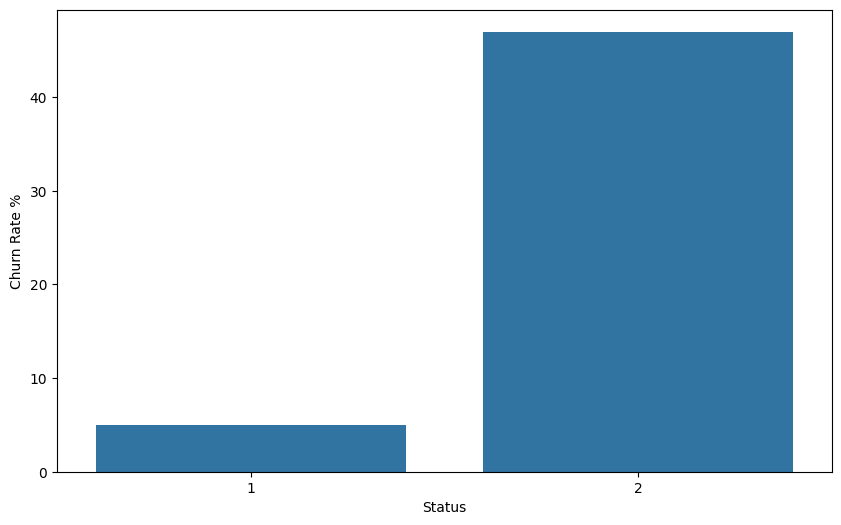

In [802]:
plt.figure(figsize=(10, 6))
sns.barplot(data = Status_rate, y = "Churn Rate %", x = "Status")
plt.show()

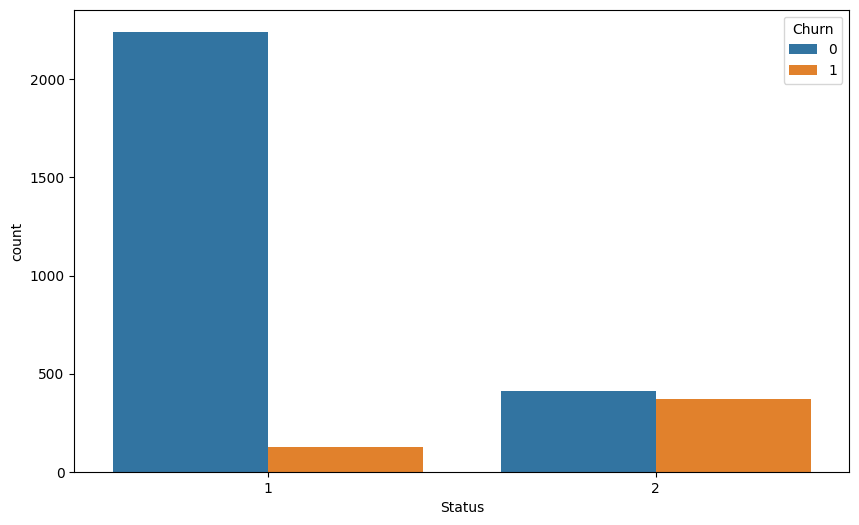

In [803]:
plt.figure(figsize=(10, 6))
sns.countplot(data = churn_df, x = "Status", hue = "Churn")
plt.show()

#### How does Age affect the rate of Churn

In [804]:
# Table showing how Complains relates to churn
Age = churn_df.groupby(['Age', 'Churn']).size().unstack().reset_index()
Age.columns = ["Age", "Did Not Churn", "Churn"]
Age

,Age,Did Not Churn,Churn
0,15,123.0,NaN
1,25,853.0,184.0
2,30,1195.0,230.0
3,45,316.0,79.0
4,55,168.0,2.0


In [805]:
Age_rate = churn_df.groupby('Age')['Churn'].value_counts(normalize=True).unstack().multiply(100).round(0).reset_index()
Age_rate.columns = ["Age", "Did Not Churn Rate %", "Churn Rate %"]
Age_rate

,Age,Did Not Churn Rate %,Churn Rate %
0,15,100.0,NaN
1,25,82.0,18.0
2,30,84.0,16.0
3,45,80.0,20.0
4,55,99.0,1.0


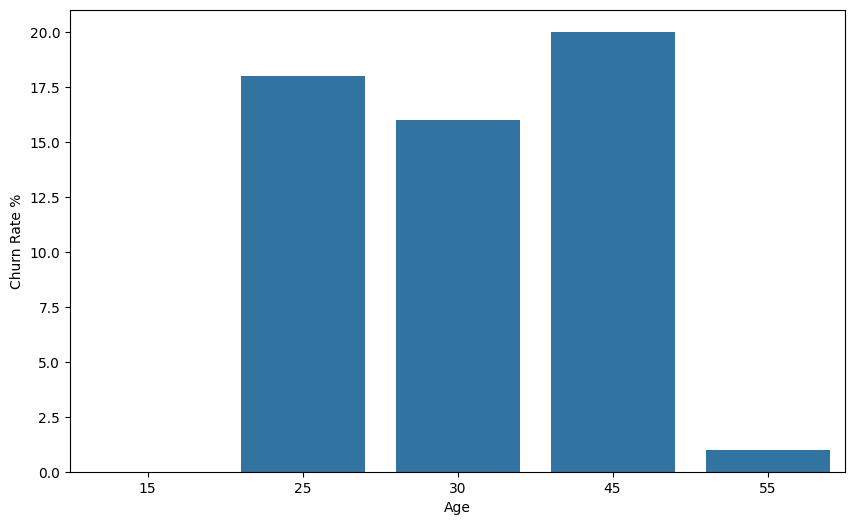

In [806]:
plt.figure(figsize=(10, 6))
sns.barplot(data = Age_rate, y = "Churn Rate %", x = "Age")
plt.show()

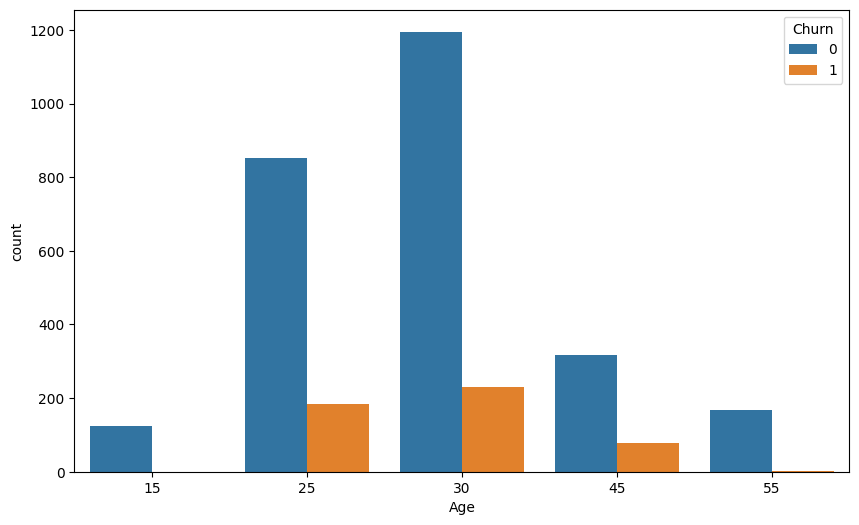

In [807]:
plt.figure(figsize=(10, 6))
sns.countplot(data = churn_df, x = "Age", hue = "Churn")
plt.show()

#### How does Categorical features affect the rate of Churn

In [808]:
num

['CallFailure',
 'SubscriptionLength',
 'ChargeAmount',
 'SecondsUse',
 'FrequencyUse',
 'FrequencySMS',
 'DistinctCalls',
 'CustomerValue']

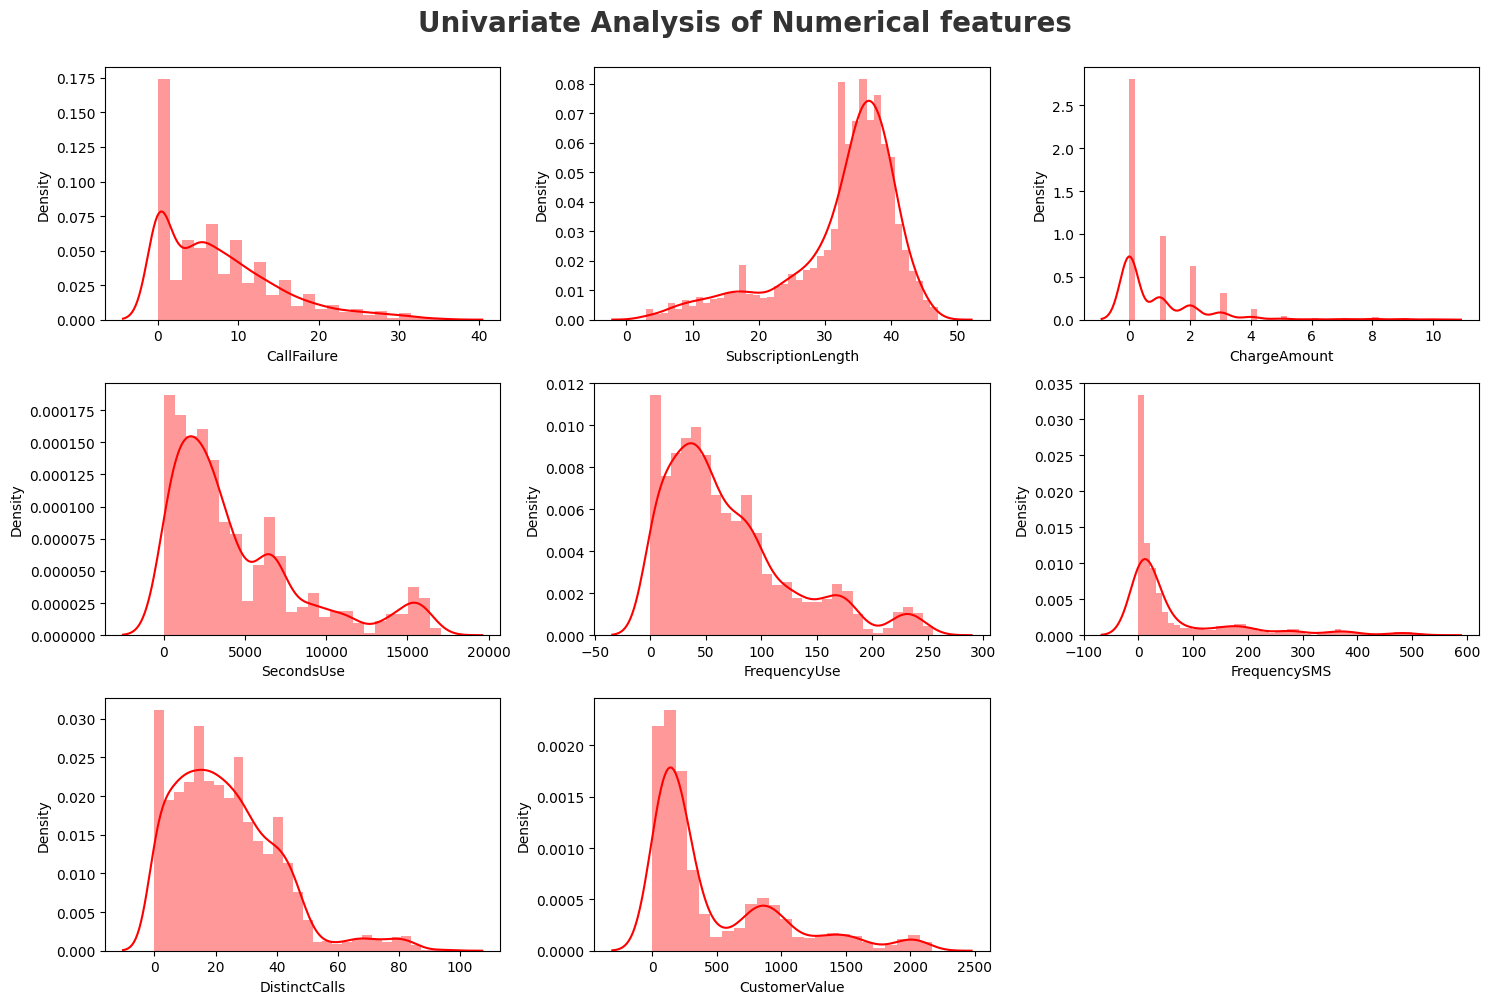

In [809]:
# Numberical features
plt.figure(figsize = (15, 10))
plt.suptitle("Univariate Analysis of Numerical features", fontsize = 20, fontweight = "bold", alpha = 0.8, y = 1)

for i in range(0, len(num)):
    plt.subplot(3, 3, i + 1)
    sns.distplot(x = churn_df[num[i]], color = "red", kde = True)
    plt.xlabel(num[i])
    plt.tight_layout()

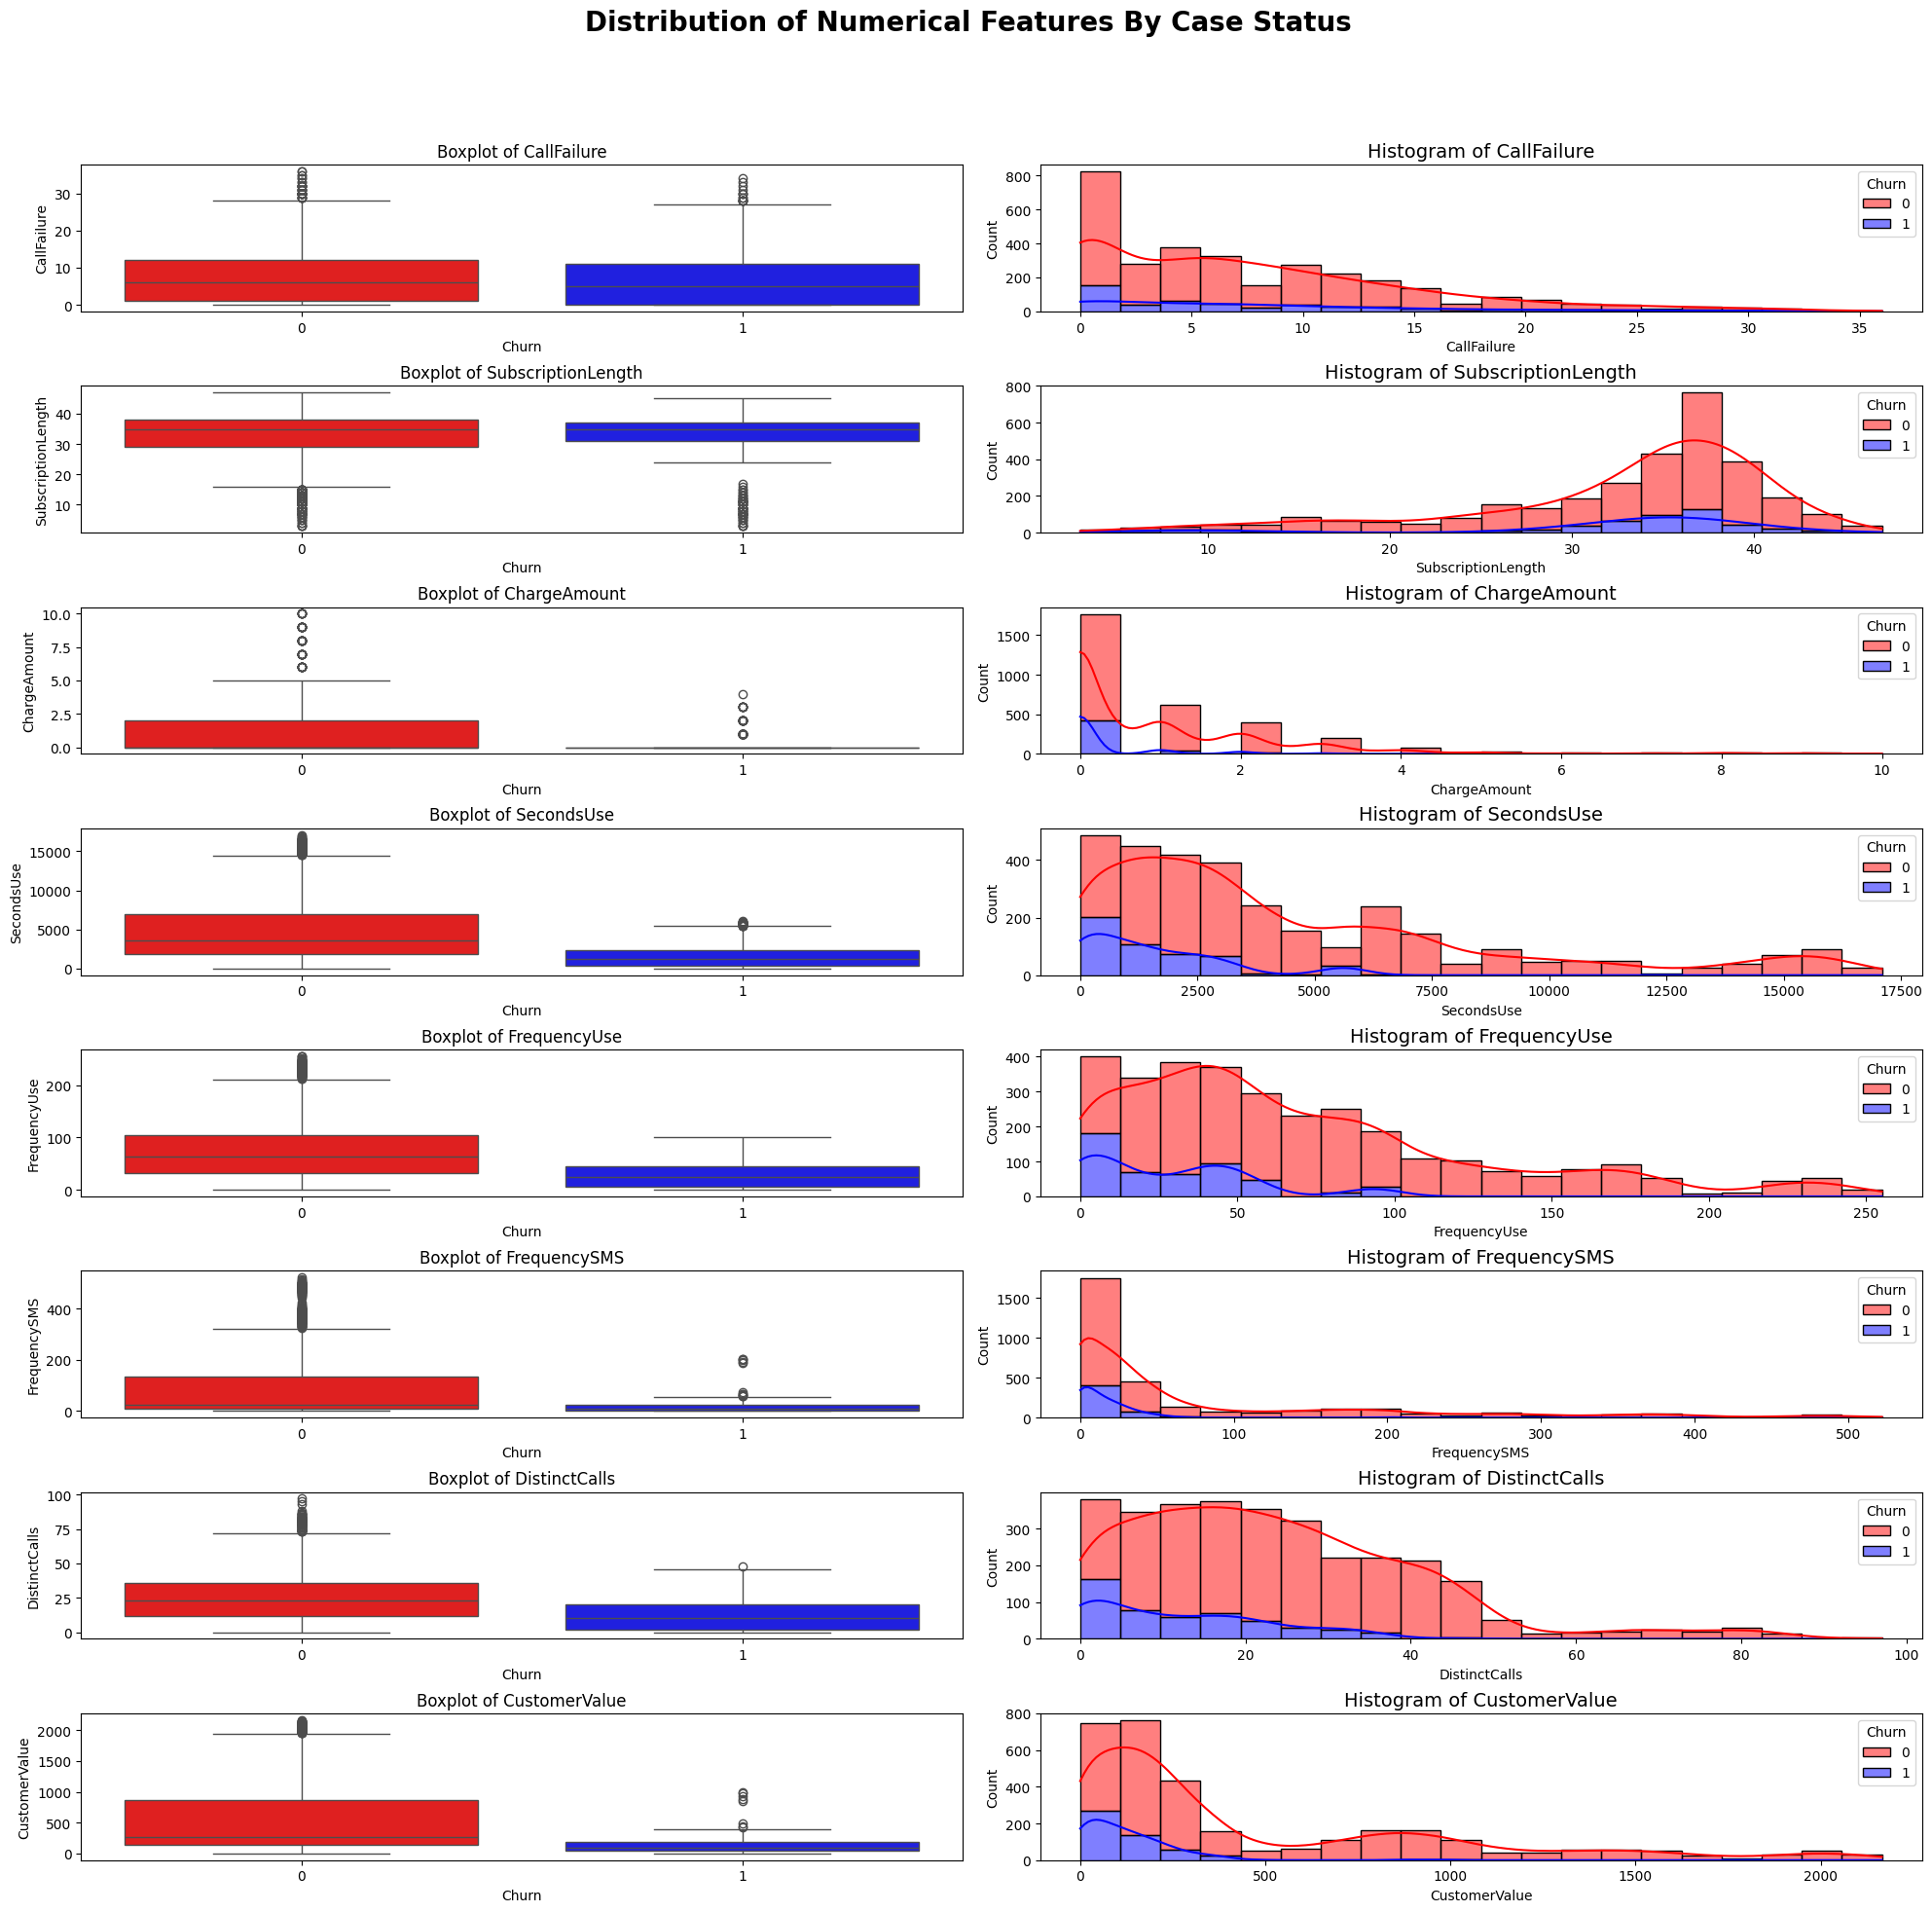

In [810]:
colour = ["red", "blue"]
fig, ax = plt.subplots(8, 2, figsize = (20, 20))
fig.suptitle("Distribution of Numerical Features By Case Status", fontsize = 20, fontweight = "bold", ha = "center")

for i, col in enumerate(num):
    sns.boxplot(data = churn_df, x = "Churn", y = col, palette = colour, ax = ax[i, 0])
    ax[i, 0].set_title(f"Boxplot of {col}", fontsize = 12)
    sns.histplot(data = churn_df, x = col, hue = "Churn", bins = 20, kde = True, multiple = "stack", palette = colour, ax = ax[i,1])
    ax[i, 1].set_title(f"Histogram of {col}", fontsize = 14)

fig.tight_layout()
fig.subplots_adjust(top = 0.9)
# plt.savefig('image/multivariate_num.png')

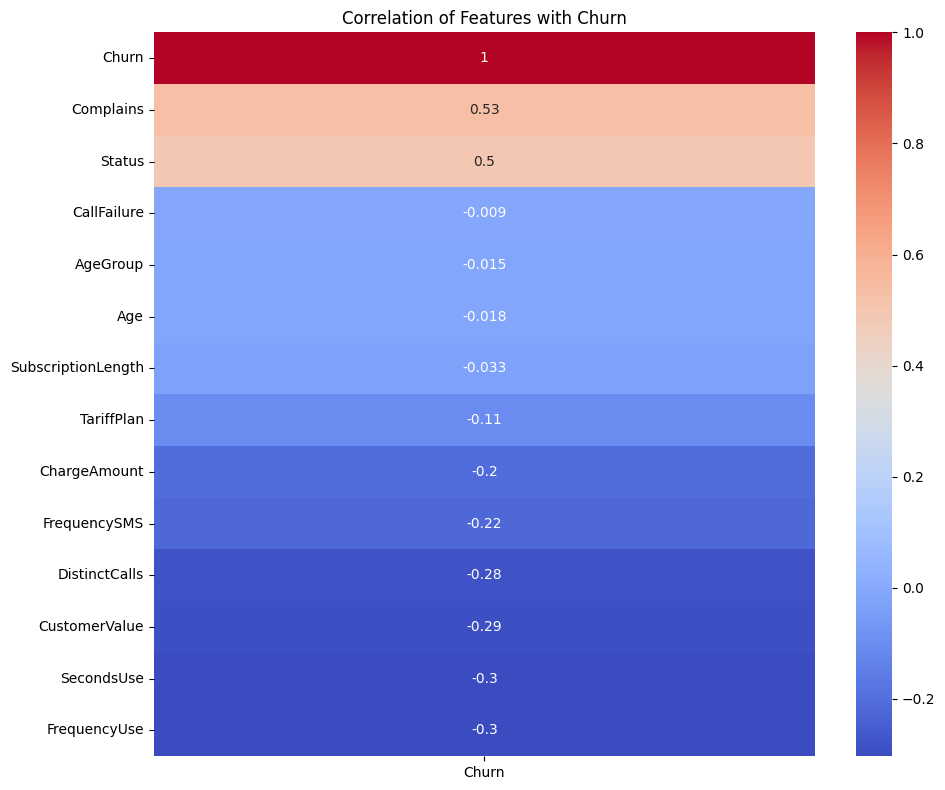

In [811]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = churn_df.corr()
sns.heatmap(corr[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Churn')
plt.tight_layout()
plt.show()

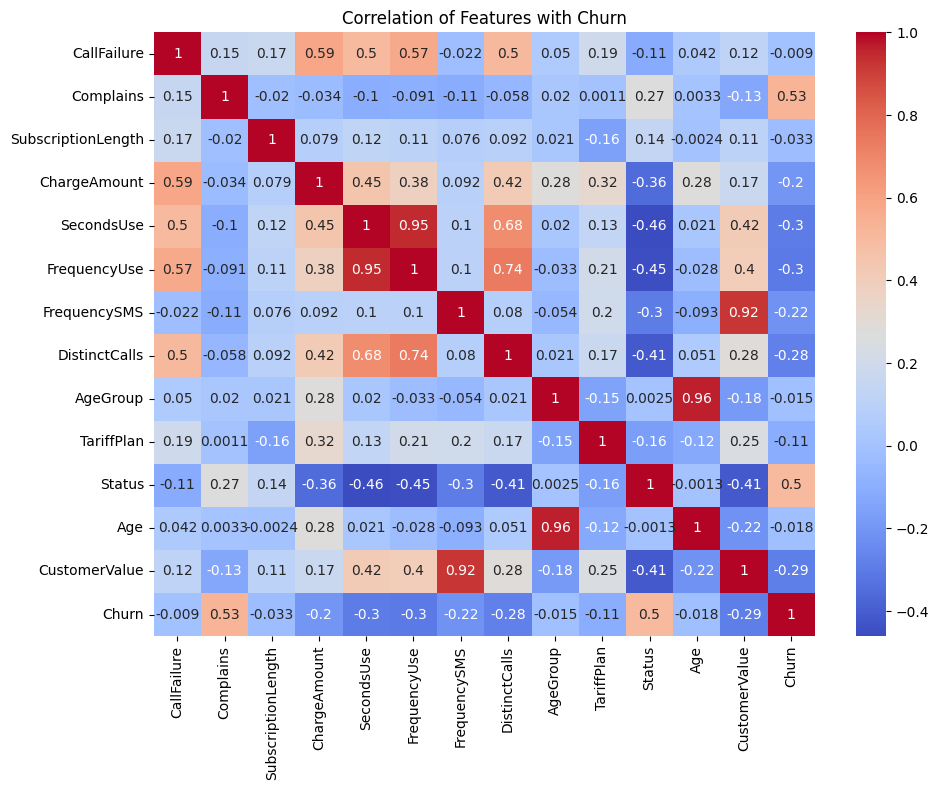

In [812]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = churn_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Churn')
plt.tight_layout()
plt.show()

### Model Building

In [813]:
churn_df.head()

,CallFailure,Complains,SubscriptionLength,ChargeAmount,SecondsUse,FrequencyUse,FrequencySMS,DistinctCalls,AgeGroup,TariffPlan,Status,Age,CustomerValue,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


##### Feature Encoding and Scaling

In [814]:
x = churn_df.drop("Churn", axis = 1)
y = churn_df["Churn"]

In [815]:
print(x.shape)
print(y.shape)

(3150, 13)
(3150,)


In [816]:
# oh_columns = [i for i in cat if i != "Churn"]
# transform_columns = num.copy()
transform_columns = x.columns

In [817]:
scaler = StandardScaler()
# oh_encoder = OneHotEncoder()

tranform_pipeline  = Pipeline(steps = [("transformer", PowerTransformer(method = "yeo-johnson")), ("scaler", scaler)])

# preprocessor = ColumnTransformer([("oh_encoder", oh_encoder, oh_columns), ("transformer", tranform_pipeline, transform_columns)])
preprocessor = ColumnTransformer([("transformer", tranform_pipeline, transform_columns)])


In [818]:
x_pro = preprocessor.fit_transform(x)

In [819]:
x_pro.shape, x.shape

((3150, 13), (3150, 13))

##### Class Imbalance

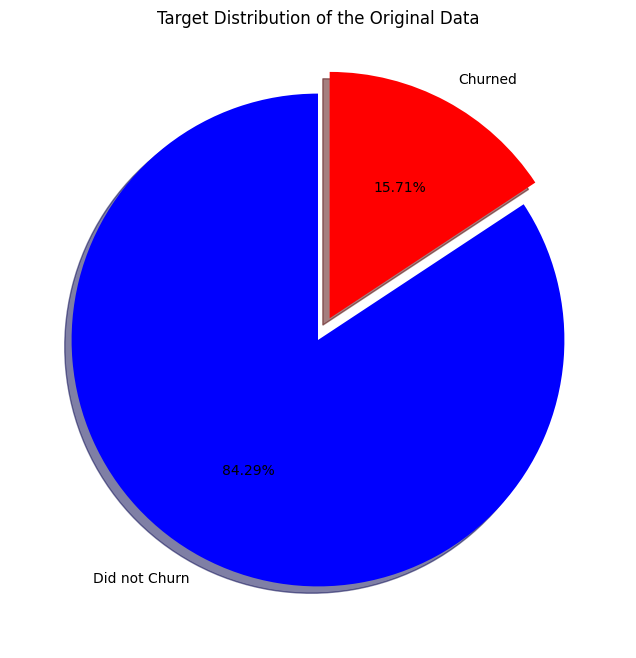

In [820]:
# Visualizing the Target variable
percentage = churn_df["Churn"].value_counts(normalize = True) * 100
labels = ["Did not Churn", "Churned"]

# plot piechart with plotly library
fig, ax = plt.subplots(figsize = (15, 8))
explode = (0, 0.1)
colour = ["blue", "red"]
ax.pie(percentage, labels = labels, startangle = 90, autopct = "%1.2f%%", explode = explode, shadow = True, colors = colour)
plt.title("Target Distribution of the Original Data")
plt.show()


In [821]:
# there is a class imbalance in the target variable, to deal with this I used the SMOTE algorithm to balance the distribution
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created
x_res, y_res = sm.fit_resample(x_pro, y) # The object is applied

In [822]:
# creating a dataframe for the balanced data
x_res_df = pd.DataFrame(x_res)
y_res_df = pd.DataFrame(y_res)
balanced_churn_df = pd.concat([x_res_df, y_res_df], axis = 1)

In [823]:
churn_df.shape, balanced_churn_df.shape

((3150, 14), (5310, 14))

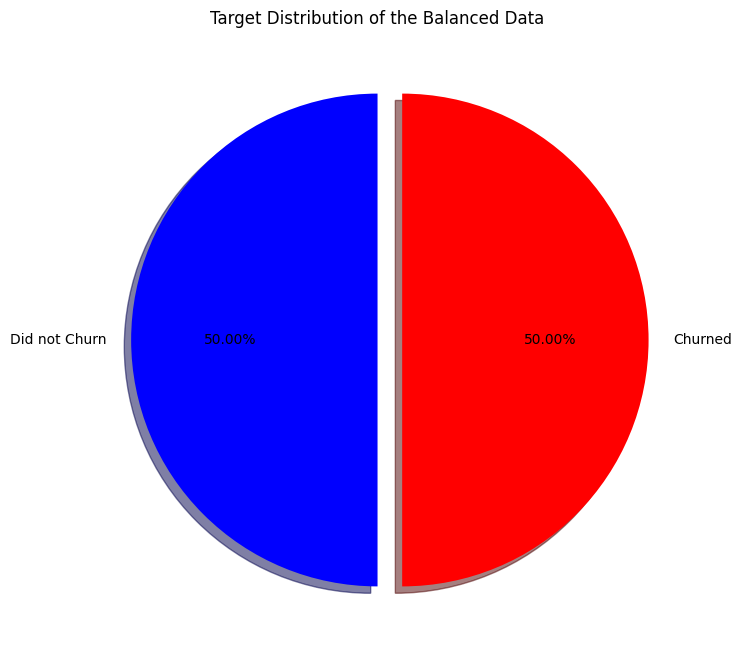

In [824]:
# Visualizing the Target variable
percentage = balanced_churn_df["Churn"].value_counts(normalize = True) * 100
labels = ["Did not Churn", "Churned"]

# plot piechart with plotly library
fig, ax = plt.subplots(figsize = (15, 8))
explode = (0, 0.1)
colour = ["blue", "red"]
ax.pie(percentage, labels = labels, startangle = 90, autopct = "%1.2f%%", explode = explode, shadow = True, colors = colour)
plt.title("Target Distribution of the Balanced Data")
plt.show()

##### Model Training

In [825]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state = 42, test_size = 0.3)

In [826]:
x_train.shape, x_test.shape

((3717, 13), (1593, 13))

In [827]:
def eval_metrics(true, predicted):
    accuracy = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return accuracy, f1, precision, recall, roc_auc

In [828]:
models = {"RF": RandomForestClassifier(verbose=0),
          "DT": DecisionTreeClassifier(),
          "GB": GradientBoostingClassifier(verbose=0),
          "LR": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "XGB": XGBClassifier(verbose=0),
          "CB": CatBoostClassifier(verbose=0),
          "SVM": SVC(),
          "ADB": AdaBoostClassifier()
          }

In [829]:
def model_evaluation(x, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Return
    '''

    # splitting the data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.3)

    model_list = []
    accuracy_list = []
    auc_list = []


    for i in range(len(list(models))):
        model = list(models.values())[i]
        model_name = list(models.keys())[i]

        # train the model
        model.fit(x_train, y_train)

        # make prediction
        y_test_pred = model.predict(x_test)

        # testing evaluation metrics
        accuracy_test, f1_test, precision_test, recall_test, roc_au_test = eval_metrics(y_test, y_test_pred)

        model_list.append(model_name)
       
        accuracy_list.append(round(accuracy_test, 3))
        auc_list.append(round(roc_au_test, 3))


    data = {'Model Name': model_list, 'Accuracy': accuracy_list, 'AUC_score': auc_list}   
    report = pd.DataFrame(data).sort_values(by=['Accuracy'], ascending = False).reset_index(drop = True)
        
    return report




In [830]:
base_models = model_evaluation(x_res, y_res, models)
base_models

,Model Name,Accuracy,AUC_score
0,XGB,0.984,0.984
1,RF,0.981,0.981
2,CB,0.981,0.981
3,KNN,0.962,0.962
4,GB,0.955,0.955
5,DT,0.954,0.954
6,SVM,0.942,0.942
7,ADB,0.935,0.935
8,LR,0.863,0.863


##### Hyperparameter Tuning

In [831]:
#Initialize few parameter for Hyperparamter tuning
xgb_params = {
    "max_depth": range(3, 10, 2),
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [10, 50, 100, 200]
    }

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
    }

cb_params = {
    "iterations": [100, 200, 300],            
    "depth": [3, 4, 5, 6, 7],            
    "bootstrap_type": ['Bayesian', 'Bernoulli']
    }



In [832]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGB', XGBClassifier(verbose = 0), xgb_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("CB", CatBoostClassifier(verbose=0), cb_params)
    ]

In [833]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   n_jobs=-1)
    random.fit(x_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for XGB -------------------
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7}
---------------- Best Params for RF -------------------
{'n_estimators': 10, 'max_features': 'log2', 'max_depth': 15}
---------------- Best Params for CB -------------------
{'iterations': 300, 'depth': 7, 'bootstrap_type': 'Bernoulli'}


In [834]:
model_param

{'XGB': {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7},
 'RF': {'n_estimators': 10, 'max_features': 'log2', 'max_depth': 15},
 'CB': {'iterations': 300, 'depth': 7, 'bootstrap_type': 'Bernoulli'}}

##### Retraining the Model with Best Params

In [835]:
tuned_models = {
    "XGB": XGBClassifier(**model_param['XGB'], verbose = 0),
    "RF": RandomForestClassifier(**model_param['RF']),
    "CB": CatBoostClassifier(**model_param['CB'], verbose = 0),
    }

best_models = model_evaluation(x_res, y_res, tuned_models)

In [836]:
best_models

,Model Name,Accuracy,AUC_score
0,XGB,0.984,0.984
1,CB,0.978,0.978
2,RF,0.977,0.977


In [837]:
best_model = XGBClassifier(**model_param['XGB'], verbose = 0)
best_model = best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("FINAL MODEL 'XGB'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'XGB'
Accuracy Score value: 0.9843
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       796
           1       0.98      0.99      0.98       797

    accuracy                           0.98      1593
   macro avg       0.98      0.98      0.98      1593
weighted avg       0.98      0.98      0.98      1593



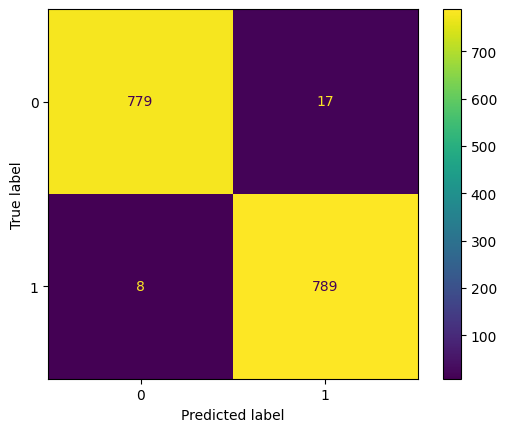

In [838]:
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)

In [839]:
churn_df.columns

Index(['CallFailure', 'Complains', 'SubscriptionLength', 'ChargeAmount',
       'SecondsUse', 'FrequencyUse', 'FrequencySMS', 'DistinctCalls',
       'AgeGroup', 'TariffPlan', 'Status', 'Age', 'CustomerValue', 'Churn'],
      dtype='object')

,Feature,Importance
10,Status,0.413314
1,Complains,0.357512
4,SecondsUse,0.047040
8,AgeGroup,0.028341
5,FrequencyUse,0.026271
7,DistinctCalls,0.025492
2,SubscriptionLength,0.024702
0,CallFailure,0.020940
3,ChargeAmount,0.019823
12,CustomerValue,0.019183


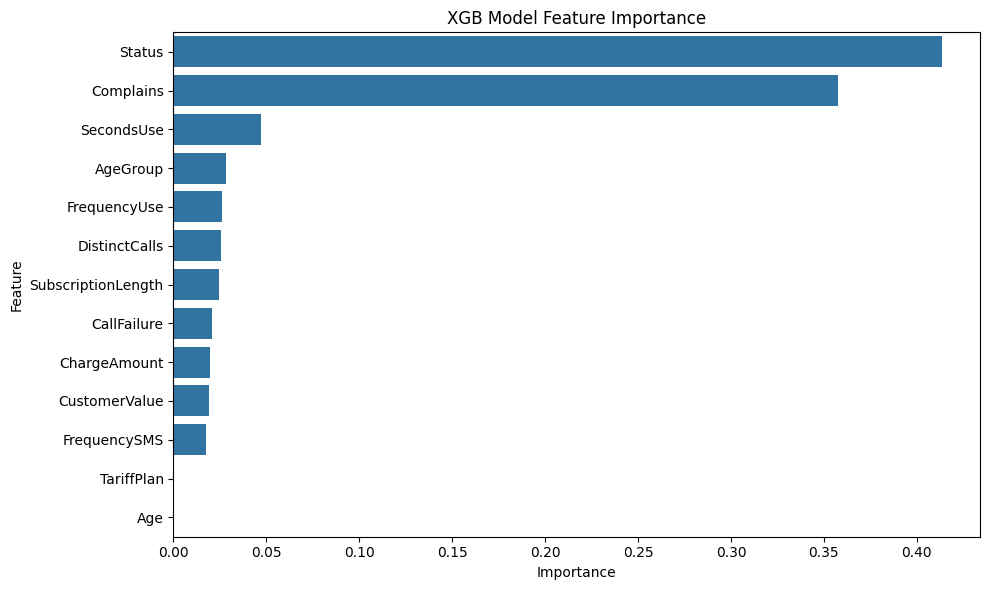

In [841]:
importances = best_model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGB Model Feature Importance')
plt.tight_layout()
plt.show()

In [849]:
feature_importance_df

,Feature,Importance
10,Status,0.413314
1,Complains,0.357512
4,SecondsUse,0.047040
8,AgeGroup,0.028341
5,FrequencyUse,0.026271
7,DistinctCalls,0.025492
2,SubscriptionLength,0.024702
0,CallFailure,0.020940
3,ChargeAmount,0.019823
12,CustomerValue,0.019183


### Model Building with Feature Selection

In [852]:
churn_df = churn_df.drop(["FrequencyUse", "Age", "TariffPlan", "FrequencySMS"], axis = 1)

In [854]:
churn_df.head()

,CallFailure,Complains,SubscriptionLength,ChargeAmount,SecondsUse,DistinctCalls,AgeGroup,Status,CustomerValue,Churn
0,8,0,38,0,4370,17,3,1,197.640,0
1,0,0,39,0,318,4,2,2,46.035,0
2,10,0,37,0,2453,24,3,1,1536.520,0
3,10,0,38,0,4198,35,1,1,240.020,0
4,3,0,38,0,2393,33,1,1,145.805,0


##### Feature Encoding and Scaling

In [855]:
x = churn_df.drop("Churn", axis = 1)
y = churn_df["Churn"]

In [856]:
print(x.shape)
print(y.shape)

(3150, 9)
(3150,)


In [857]:
# oh_columns = [i for i in cat if i != "Churn"]
# transform_columns = num.copy()
transform_columns = x.columns

In [858]:
scaler = StandardScaler()
# oh_encoder = OneHotEncoder()

tranform_pipeline  = Pipeline(steps = [("transformer", PowerTransformer(method = "yeo-johnson")), ("scaler", scaler)])

# preprocessor = ColumnTransformer([("oh_encoder", oh_encoder, oh_columns), ("transformer", tranform_pipeline, transform_columns)])
preprocessor = ColumnTransformer([("transformer", tranform_pipeline, transform_columns)])


In [859]:
x_pro = preprocessor.fit_transform(x)

In [860]:
x_pro.shape, x.shape

((3150, 9), (3150, 9))

##### Class Imbalance

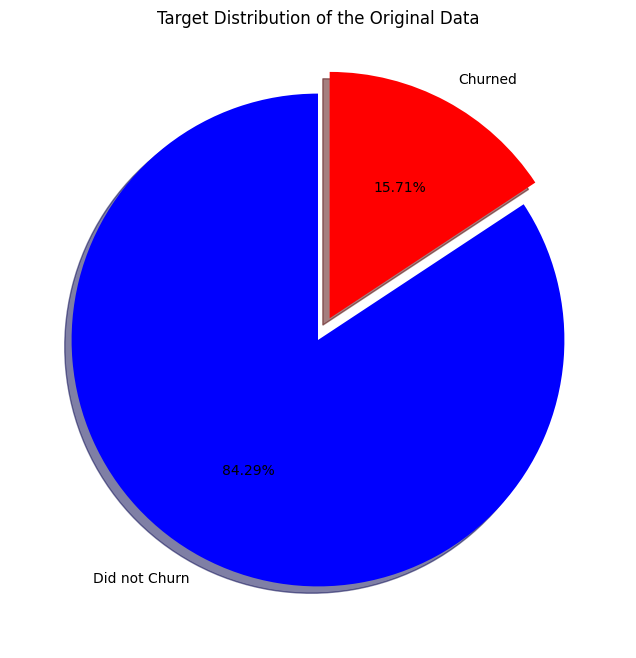

In [861]:
# Visualizing the Target variable
percentage = churn_df["Churn"].value_counts(normalize = True) * 100
labels = ["Did not Churn", "Churned"]

# plot piechart with plotly library
fig, ax = plt.subplots(figsize = (15, 8))
explode = (0, 0.1)
colour = ["blue", "red"]
ax.pie(percentage, labels = labels, startangle = 90, autopct = "%1.2f%%", explode = explode, shadow = True, colors = colour)
plt.title("Target Distribution of the Original Data")
plt.show()


In [862]:
# there is a class imbalance in the target variable, to deal with this I used the SMOTE algorithm to balance the distribution
sm = SMOTE(random_state=42, k_neighbors = 2) # The object is created
x_res, y_res = sm.fit_resample(x_pro, y) # The object is applied

In [863]:
# creating a dataframe for the balanced data
x_res_df = pd.DataFrame(x_res)
y_res_df = pd.DataFrame(y_res)
balanced_churn_df = pd.concat([x_res_df, y_res_df], axis = 1)

In [864]:
churn_df.shape, balanced_churn_df.shape

((3150, 10), (5310, 10))

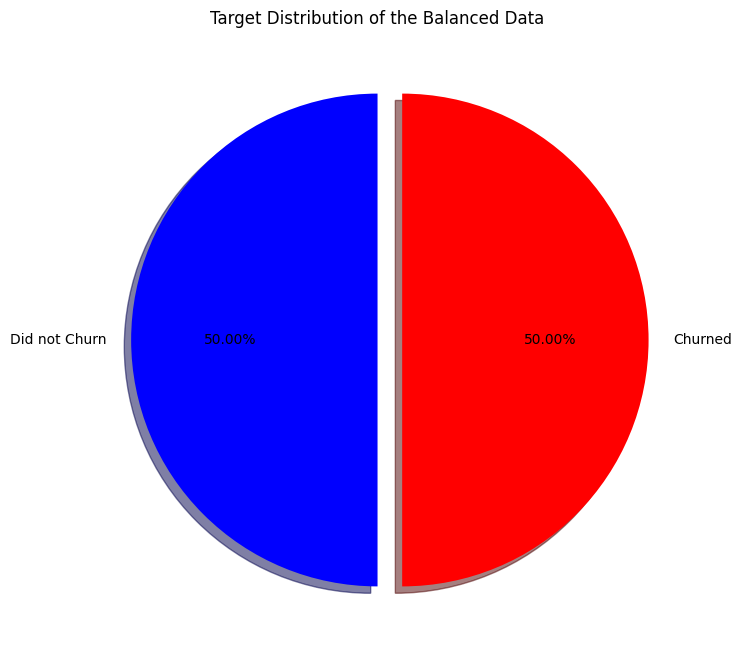

In [865]:
# Visualizing the Target variable
percentage = balanced_churn_df["Churn"].value_counts(normalize = True) * 100
labels = ["Did not Churn", "Churned"]

# plot piechart with plotly library
fig, ax = plt.subplots(figsize = (15, 8))
explode = (0, 0.1)
colour = ["blue", "red"]
ax.pie(percentage, labels = labels, startangle = 90, autopct = "%1.2f%%", explode = explode, shadow = True, colors = colour)
plt.title("Target Distribution of the Balanced Data")
plt.show()

##### Model Training

In [866]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state = 42, test_size = 0.3)

In [867]:
x_train.shape, x_test.shape

((3717, 9), (1593, 9))

In [868]:
def eval_metrics(true, predicted):
    accuracy = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    return accuracy, f1, precision, recall, roc_auc

In [869]:
models = {"RF": RandomForestClassifier(verbose=0),
          "DT": DecisionTreeClassifier(),
          "GB": GradientBoostingClassifier(verbose=0),
          "LR": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "XGB": XGBClassifier(verbose=0),
          "CB": CatBoostClassifier(verbose=0),
          "SVM": SVC(),
          "ADB": AdaBoostClassifier()
          }

In [870]:
def model_evaluation(x, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Return
    '''

    # splitting the data into training and testing set
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.3)

    model_list = []
    accuracy_list = []
    auc_list = []


    for i in range(len(list(models))):
        model = list(models.values())[i]
        model_name = list(models.keys())[i]

        # train the model
        model.fit(x_train, y_train)

        # make prediction
        y_test_pred = model.predict(x_test)

        # testing evaluation metrics
        accuracy_test, f1_test, precision_test, recall_test, roc_au_test = eval_metrics(y_test, y_test_pred)

        model_list.append(model_name)
       
        accuracy_list.append(round(accuracy_test, 3))
        auc_list.append(round(roc_au_test, 3))


    data = {'Model Name': model_list, 'Accuracy': accuracy_list, 'AUC_score': auc_list}   
    report = pd.DataFrame(data).sort_values(by=['Accuracy'], ascending = False).reset_index(drop = True)
        
    return report




In [871]:
base_models = model_evaluation(x_res, y_res, models)
base_models

,Model Name,Accuracy,AUC_score
0,CB,0.976,0.976
1,XGB,0.975,0.975
2,RF,0.970,0.970
3,KNN,0.961,0.961
4,DT,0.952,0.952
5,GB,0.952,0.952
6,SVM,0.931,0.931
7,ADB,0.925,0.925
8,LR,0.850,0.850


##### Hyperparameter Tuning

In [872]:
#Initialize few parameter for Hyperparamter tuning
xgb_params = {
    "max_depth": range(3, 10, 2),
    "max_features": ["sqrt", "log2", None],
    "n_estimators": [10, 50, 100, 200]
    }

rf_params = {
    "max_depth": [10, 12, None, 15, 20],
    "max_features": ['sqrt', 'log2', None],
    "n_estimators": [10, 50, 100, 200]
    }

cb_params = {
    "iterations": [100, 200, 300],            
    "depth": [3, 4, 5, 6, 7],            
    "bootstrap_type": ['Bayesian', 'Bernoulli']
    }



In [873]:
# Models list for Hyperparameter tuning
randomcv_models = [
    ('XGB', XGBClassifier(verbose = 0), xgb_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("CB", CatBoostClassifier(verbose=0), cb_params)
    ]

In [874]:
model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   n_jobs=-1)
    random.fit(x_res, y_res)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

---------------- Best Params for XGB -------------------
{'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7}
---------------- Best Params for RF -------------------
{'n_estimators': 200, 'max_features': 'log2', 'max_depth': None}
---------------- Best Params for CB -------------------
{'iterations': 300, 'depth': 7, 'bootstrap_type': 'Bernoulli'}


In [875]:
model_param

{'XGB': {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 7},
 'RF': {'n_estimators': 200, 'max_features': 'log2', 'max_depth': None},
 'CB': {'iterations': 300, 'depth': 7, 'bootstrap_type': 'Bernoulli'}}

##### Retraining the Model with Best Params

In [876]:
tuned_models = {
    "XGB": XGBClassifier(**model_param['XGB'], verbose = 0),
    "RF": RandomForestClassifier(**model_param['RF']),
    "CB": CatBoostClassifier(**model_param['CB'], verbose = 0),
    }

best_models = model_evaluation(x_res, y_res, tuned_models)

In [877]:
best_models

,Model Name,Accuracy,AUC_score
0,XGB,0.976,0.976
1,CB,0.976,0.976
2,RF,0.970,0.970


In [878]:
best_model = XGBClassifier(**model_param['XGB'], verbose = 0)
best_model = best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("FINAL MODEL 'XGB'")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL MODEL 'XGB'
Accuracy Score value: 0.9755
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       796
           1       0.97      0.98      0.98       797

    accuracy                           0.98      1593
   macro avg       0.98      0.98      0.98      1593
weighted avg       0.98      0.98      0.98      1593



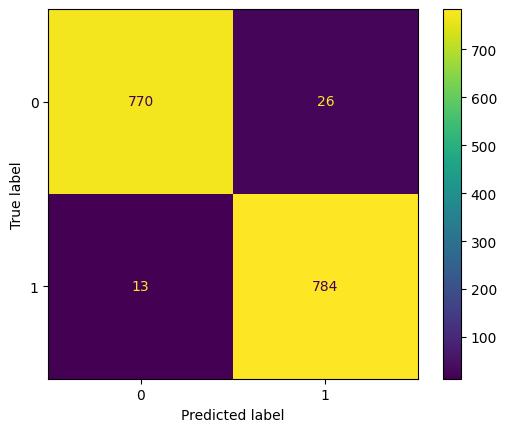

In [879]:
ConfusionMatrixDisplay.from_estimator(best_model, x_test, y_test)

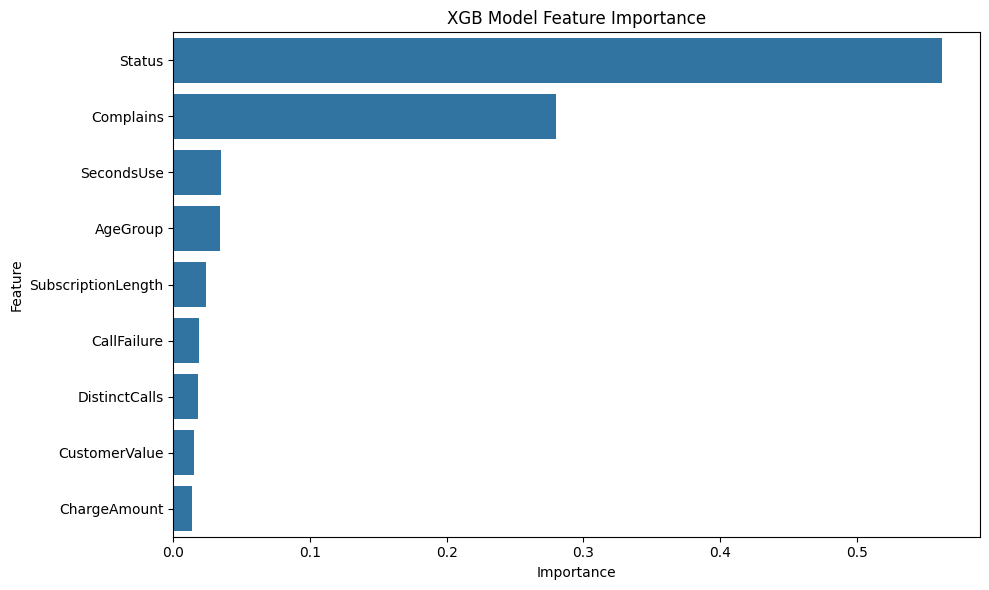

In [881]:
importances = best_model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('XGB Model Feature Importance')
plt.tight_layout()
plt.show()

In [882]:
feature_importance_df

,Feature,Importance
7,Status,0.561966
1,Complains,0.279978
4,SecondsUse,0.034854
6,AgeGroup,0.034110
2,SubscriptionLength,0.023947
0,CallFailure,0.018650
5,DistinctCalls,0.017743
8,CustomerValue,0.014936
3,ChargeAmount,0.013817
